In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\archive\AirPassengers.csv", index_col='Month', parse_dates=True)


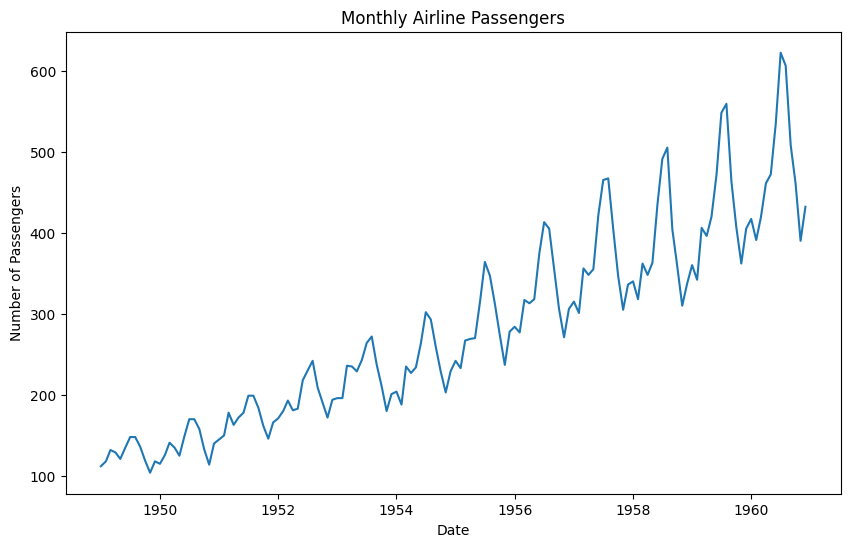

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [7]:
print(data.columns)

Index(['#Passengers'], dtype='object')


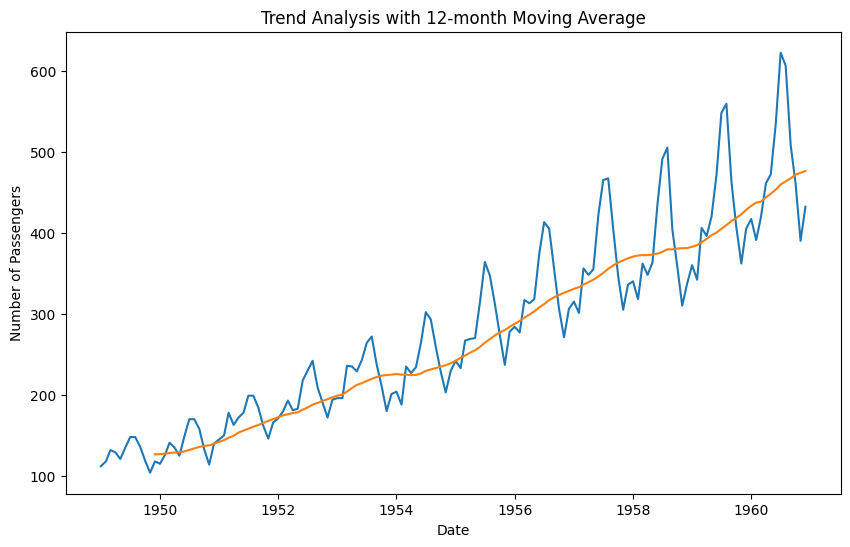

In [12]:
# Clean column names
data.columns = data.columns.str.strip()

# Add 12-month moving average
data['12-month Moving Average'] = data['#Passengers'].rolling(window=12).mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Trend Analysis with 12-month Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

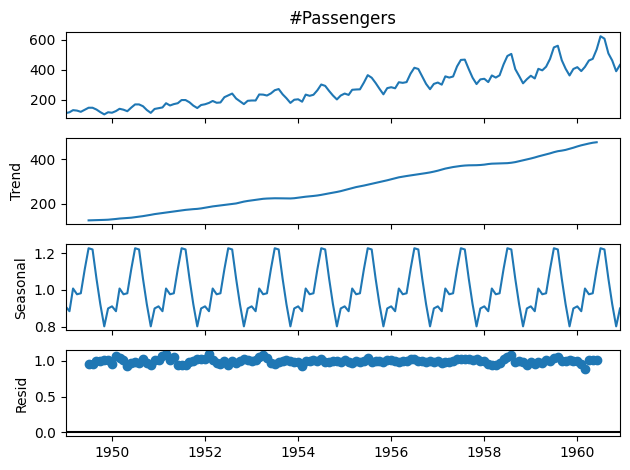

In [14]:
#Seasonality: Repeating patterns or cycles in the data at regular 
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')
decomposition.plot()
plt.show()

In [16]:
#Stationarity: The statistical properties of a time series, such as mean and variance, remain constant over time.
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


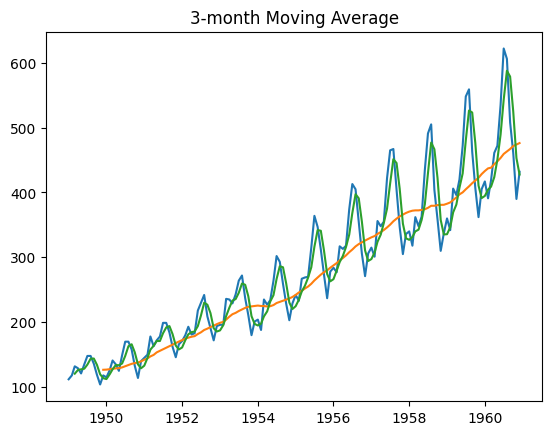

In [18]:
#Moving Average: Smoothing the time series data to identify trends.
data['Moving Average'] = data['#Passengers'].rolling(window=3).mean()
plt.plot(data)
plt.title('3-month Moving Average')
plt.show()


E:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


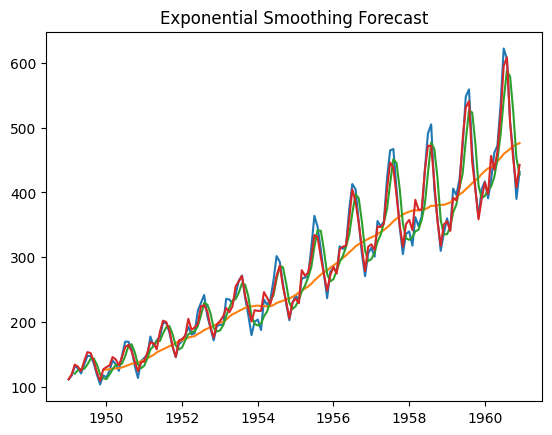

In [19]:
#Exponential Smoothing: Giving more weight to recent data points to smooth the series.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
data['Forecast'] = fitted_model.fittedvalues
plt.plot(data)
plt.title('Exponential Smoothing Forecast')
plt.show()

E:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


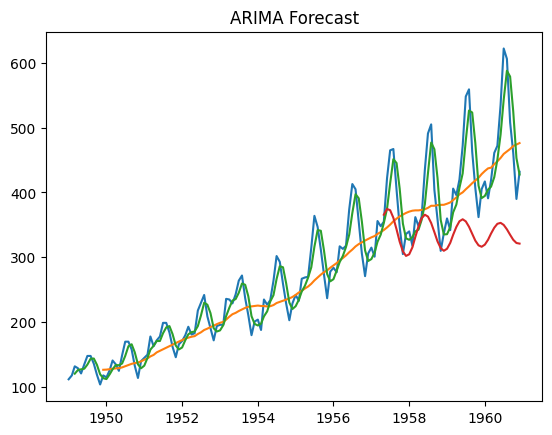

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['#Passengers'], order=(2, 1, 2))
model_fit = model.fit()
data['Forecast'] = model_fit.predict(start=100, end=144, dynamic=True)
plt.plot(data)
plt.title('ARIMA Forecast')
plt.show()

In [22]:
!pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable


In [30]:
pip install --upgrade hmmlearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from hmmlearn.hmm import CategoricalHMM

# Define hidden states and observation symbols
states = ["Rainy", "Sunny"]
observations = ["walk", "shop", "clean"]

# Index mapping for observations
obs_map = {obs: i for i, obs in enumerate(observations)}

# HMM parameters
start_probability = np.array([0.6, 0.4])

transition_matrix = np.array([
    [0.7, 0.3],
    [0.4, 0.6]
])

emission_matrix = np.array([
    [0.1, 0.4, 0.5],  # Rainy emits walk, shop, clean
    [0.6, 0.3, 0.1]   # Sunny emits walk, shop, clean
])

# Observation sequence (as integers)
obs_seq = ["walk", "shop", "clean", "shop", "walk"]
observed_sequence = np.array([[obs_map[o]] for o in obs_seq])

# Build and set up the HMM
model = CategoricalHMM(n_components=2, init_params="", n_features=3)
model.startprob_ = start_probability
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# Decode the observed sequence
logprob, hidden_states = model.decode(observed_sequence, algorithm="viterbi")

# Output results
print("Observed sequence:", obs_seq)
print("Predicted hidden states:", [states[i] for i in hidden_states])


Observed sequence: ['walk', 'shop', 'clean', 'shop', 'walk']
Predicted hidden states: ['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Sunny']


In [ ]:
import tensorflow as tf